### Discrete Fourier Transform from scratch

The DFT is the most important discrete transform, used to perform Fourier analysis. The function is any quantity or signal that varies over time, such as the pressure of a sound wave, a radio signal, or temperature readings, sampled over a finite time interval (often defined by a window function).

### $ X_k = \sum\limits_{n=0}^{N-1} x_n \cdot e^{-i2\pi \frac{k}{N}n}$

In [1]:
import cmath

def dft(signal):
    N = len(signal)
    res = []
    
    for k in range(N):
        summand = 0
        for n in range(N):
            angle = 2 * cmath.pi * k * n / N
            summand += signal[n] * cmath.exp(-1j * angle)
        # res.append(summand)

        rounded_summand = round(summand.real, 2) + round(summand.imag, 2) * 1j
        res.append(rounded_summand)

    return res

signal = [1, 2, 3, 4]
dft_result = dft(signal)
print(dft_result)


[(10+0j), (-2+2j), (-2+0j), (-2-2j)]


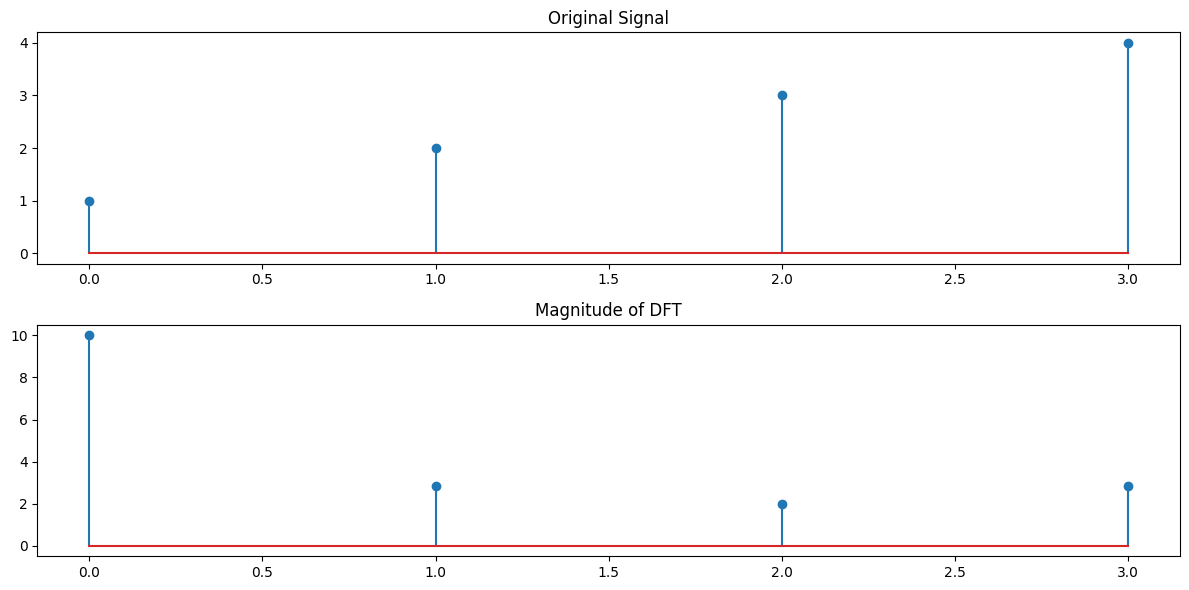

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(signal)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.stem([abs(i) for i in dft_result])
plt.title('Magnitude of DFT')

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
cycles = 2
samples = 25

length = np.pi * 2 * cycles
wave = np.sin(np.arange(0, length, length / samples))

array([ 0.        ,  0.48175367,  0.84432793,  0.99802673,  0.90482705,
        0.58778525,  0.12533323, -0.36812455, -0.77051324, -0.98228725,
       -0.95105652, -0.68454711, -0.24868989,  0.24868989,  0.68454711,
        0.95105652,  0.98228725,  0.77051324,  0.36812455, -0.12533323,
       -0.58778525, -0.90482705, -0.99802673, -0.84432793, -0.48175367])

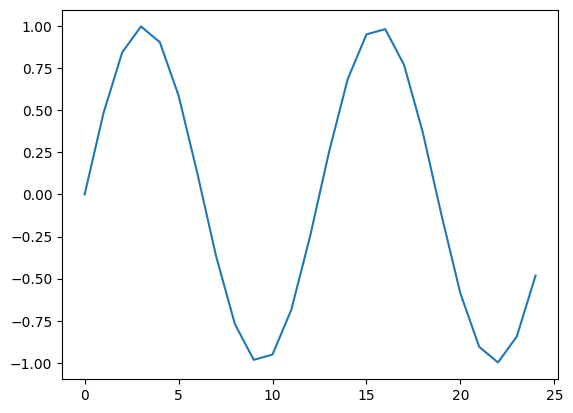

In [4]:
plt.plot(wave)
wave

[0j, 0j, -12.5j, 0j, 0j, 0j, 0j, 0j, 0j, (-0+0j), 0j, (-0+0j), 0j, 0j, (-0+0j), (-0+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 12.5j, 0j]


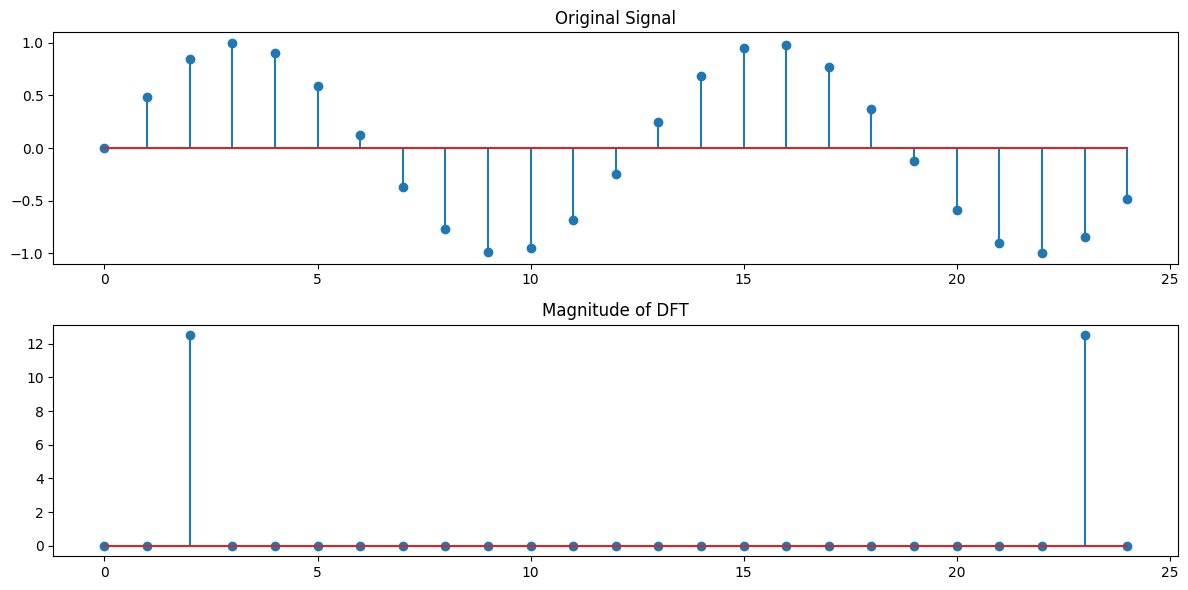

In [6]:
dft_result = dft(wave.tolist())
print(dft_result)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(wave)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.stem([abs(i) for i in dft_result])
plt.title('Magnitude of DFT')

plt.tight_layout()
plt.show()